## University of Bahrain

### College of IT

#### ITCS494 Machine Learning
#### Lab 5. Support Vector Machines (13-12-2020)

##### RAMSHA KHALID MUHAMMAD KHALID - 20168013

Scikit Learn has a nice library for building SVM models and testing them. We will utilize this library, so it might be helpful to visit its documentation http://scikit-learn.org/stable/modules/svm.html .

In this lab you will train a classifier, then calculate the accuracy of the model using what you learned during this course.

###### Problem
The aim of this lab assignment is to apply your knowledge from SVMs (Lecture 8) to design a classifier for Arabic handwritten digits.

###### Dataset
Please visit the following website to download the dataset http://datacenter.aucegypt.edu/shazeem/ Use MADBase datasets. You can use the flattened one if you like.

###### Tasks

We will implement a soft-margin SVM for handwritten digits from the dataset. The classifier is a binary classifier for one-vs-one (one digit is class +1 and another digit is class -1) classification. We will not do all digits, just one classifier as an example for the digit “1” (+1) vs “6” (-1).

* Use a linear kernel K(u,v)=uT v. Train and test using all of the data points available. Then redo the fitting of the model using smaller subsets of the training data (i.e. the first 50, 100, 200, 800) and output the accuracy results in a table. [4 points]

* Consider the polynomial kernel K(u,v)=(1+uT v)Q, where Q is the degree of the polynomial. Compare Q=2 and Q=5 by training the models and printing their accuracy. [3 points]

* Consider the radial basis function (RBF) kernel K(u,v)=exp(-||u-v||2) in the soft-margin SVM. Which value of C in {0.01, 1, 100, 104, 106) results in the lowest error? [3 points]
 
Prepare a Jupyter notebook with the results and submit it on or before the due date.

In [1]:
#necessary library installations

!pip install pillow
!pip install tabulate
!pip install sklearn
!pip install numpy

In [2]:
#import libraries

from PIL import Image
import numpy as np
import pathlib
import random
from os import listdir
from sklearn.utils import shuffle
from sklearn import svm
from tabulate import tabulate
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
#link to dataset directories for digit one and six
train_ones = listdir("Training/ONE")
train_sixes = listdir("Training/SIX")

test_ones = listdir("Testing/ONE")
test_sixes = listdir("Testing/SIX")

train_data = []
train_label = []

test_data = []
test_label = []

In [4]:
#read training images from directory and change to array

#read all ones and append to training array
for image in train_ones:
    link = "Training/ONE/" + image
    if(link.endswith('bmp')):
        an_image = Image.open(link)
        image_sequence = an_image.getdata()
        image_array = np.array(image_sequence)
        train_data.append(image_array)
        train_label.append(0)

#read all sixes and append to training array
for image in train_sixes:
    link = "Training/SIX/" + image
    if(link.endswith('bmp')):
        an_image = Image.open(link)
        image_sequence = an_image.getdata()
        image_array = np.array(image_sequence)
        train_data.append(image_array)
        train_label.append(1)
    
len(train_data),len(train_label)

(12000, 12000)

In [5]:
#read testing images from directory and change to array

#read all ones and append to testing array
for image in test_ones:
    link = "Testing/ONE/" + image
    if(link.endswith('bmp')):
        an_image = Image.open(link)
        image_sequence = an_image.getdata()
        image_array = np.array(image_sequence)
        test_data.append(image_array)
        test_label.append(0)

#read all sixes and append to testing array
for image in test_sixes:
    link = "Testing/SIX/" + image
    if(link.endswith('bmp')):
        an_image = Image.open(link)
        image_sequence = an_image.getdata()
        image_array = np.array(image_sequence)
        test_data.append(image_array)
        test_label.append(1)
    
len(test_data),len(test_label)

(2000, 2000)

In [6]:
#random shuffle the training and testing arrays

train_data, train_label = shuffle(train_data, train_label)
test_data, test_label = shuffle(test_data, test_label)

In [7]:
#getting first 20%, 40%, 60% and 80% of train data

train_data_20 = train_data[:2400]
train_label_20 = train_label[:2400]

train_data_40 = train_data[:4800]
train_label_40 = train_label[:4800]

train_data_60 = train_data[:7200]
train_label_60 = train_label[:7200]

train_data_80 = train_data[:9600]
train_label_80 = train_label[:9600]

In [8]:
#define methods to fit, predict and find accuracy and error of models

def fit(data, label, model):
    return model.fit(data, label)

def predict(testData, model):
    return model.predict(testData) 

def findAccuracy(prediction, actual):
    return accuracy_score(actual, prediction)

def meanSquaredError(prediction, actual):
    return mean_squared_error(actual, prediction)

In [9]:
#linear kernel svm
linear_svm = svm.SVC(kernel ='linear')

linear_svm_accuracy = []

#fit, train and find accuracy of models with different data percent 
linear_svm_accuracy.append(findAccuracy(predict(test_data, fit(train_data_20, train_label_20, linear_svm)), test_label))
linear_svm_accuracy.append(findAccuracy(predict(test_data, fit(train_data_40, train_label_40, linear_svm)), test_label))
linear_svm_accuracy.append(findAccuracy(predict(test_data, fit(train_data_60, train_label_60, linear_svm)), test_label))
linear_svm_accuracy.append(findAccuracy(predict(test_data, fit(train_data_80, train_label_80, linear_svm)), test_label))
linear_svm_accuracy.append(findAccuracy(predict(test_data, fit(train_data, train_label, linear_svm)), test_label))

linear_svm_accuracy

[0.9855, 0.99, 0.9905, 0.9935, 0.9935]

In [10]:
#print table to show accuracy percentages
linear_accuracy_table = []
percentage = 20
for i in range(5):
    accuracy = str(np.round(linear_svm_accuracy[i]*100, 2)) + "%"
    linear_accuracy_table.append([percentage, accuracy])
    percentage+= 20
    
print(tabulate(linear_accuracy_table, headers=['Data Subset Percentage', 'Accuracy percent'], tablefmt="orgtbl", colalign=("center", "center")))

|  Data Subset Percentage  |  Accuracy percent  |
|--------------------------+--------------------|
|            20            |       98.55%       |
|            40            |       99.0%        |
|            60            |       99.05%       |
|            80            |       99.35%       |
|           100            |       99.35%       |


In [11]:
#polynomial kernel svm with degree 2 and 5
poly_svm_2 = svm.SVC(kernel ='poly', degree=2)
poly_svm_5 = svm.SVC(kernel ='poly', degree=5)

poly_svm_accuracy = []

#fit, train and find accuracy of both models
poly_svm_accuracy.append(findAccuracy(predict(test_data, fit(train_data, train_label, poly_svm_2)), test_label))
poly_svm_accuracy.append(findAccuracy(predict(test_data, fit(train_data, train_label, poly_svm_5)), test_label))

poly_svm_accuracy

[0.9955, 0.996]

In [12]:
#print table to show accuracy percentages
poly_accuracy_table = []
degree = 2
for i in range(2):
    accuracy = str(np.round(poly_svm_accuracy[i]*100, 2)) + "%"
    poly_accuracy_table.append([degree, accuracy])
    degree+=3
    
print(tabulate(poly_accuracy_table, headers=['Model Polynomial Degree (Q)', 'Accuracy percent'], tablefmt="orgtbl", colalign=("center", "center")))

|  Model Polynomial Degree (Q)  |  Accuracy percent  |
|-------------------------------+--------------------|
|               2               |       99.55%       |
|               5               |       99.6%        |


In [13]:
#rbs svm model

# set values of c for each model
Ca = 0.01
Cb = 1
Cc = 100
Cd = 104
Ce = 106

#create all models with different value of C
rbf_svm_a = svm.SVC(kernel ='rbf', C=Ca)
rbf_svm_b = svm.SVC(kernel ='rbf', C=Cb)
rbf_svm_c = svm.SVC(kernel ='rbf', C=Cc)
rbf_svm_d = svm.SVC(kernel ='rbf', C=Cd)
rbf_svm_e = svm.SVC(kernel ='rbf', C=Ce)

model_rbf_error = []

#fit, predict and find mean square error for all models with different value of C
model_rbf_error.append(meanSquaredError(predict(test_data, fit(train_data, train_label, rbf_svm_a)), test_label))
model_rbf_error.append(meanSquaredError(predict(test_data, fit(train_data, train_label, rbf_svm_b)), test_label))
model_rbf_error.append(meanSquaredError(predict(test_data, fit(train_data, train_label, rbf_svm_c)), test_label))
model_rbf_error.append(meanSquaredError(predict(test_data, fit(train_data, train_label, rbf_svm_d)), test_label))
model_rbf_error.append(meanSquaredError(predict(test_data, fit(train_data, train_label, rbf_svm_e)), test_label))

model_rbf_error

[0.011, 0.002, 0.002, 0.002, 0.002]

In [14]:
#print table to show accuracy percentages
rbf_error_table = []
rbf_error_table.append([Ca, model_rbf_error[0]])
rbf_error_table.append([Cb, model_rbf_error[1]])
rbf_error_table.append([Cc, model_rbf_error[2]])
rbf_error_table.append([Cd, model_rbf_error[3]])
rbf_error_table.append([Ce, model_rbf_error[4]])
    
print(tabulate(rbf_error_table, headers=['Value of C', 'Mean Squared Error'], tablefmt="orgtbl", colalign=("center", "center")))

|  Value of C  |  Mean Squared Error  |
|--------------+----------------------|
|     0.01     |        0.011         |
|      1       |        0.002         |
|     100      |        0.002         |
|     104      |        0.002         |
|     106      |        0.002         |


Actual SIX
Predicted SIX


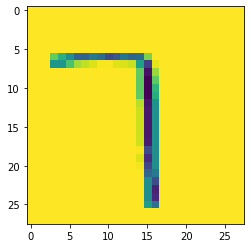

In [16]:
#visual testing
#keep the index number and model of your choice below

array = []
labeldict = {
  0 : "ONE",
  1 : "SIX"
}

####### model list #######
# linear models
# linear_svm -> trained with all data
# linear_svm_20 -> trained with first 20% of data
# linear_svm_40 -> trained with first 40% of data
# linear_Svm_60 -> trained with first 60% of data
# linear_Svm_60 -> trained with first 80% of data

# polynomial models
# poly_svm_2 -> trained with polynomial degree 2
# poly_Svm_5 -> trained with polynomial degree 5

# rbs models
# rbf_svm_a -> trained with C = 0.01
# rbf_svm_b -> trained with C = 1
# rbf_svm_c -> trained with C = 100
# rbf_svm_d -> trained with C = 104
# rbf_svm_e -> trained with C = 106

index = 5 #any index number from 0 to 1999
model = linear_svm #any model from list above

array.append(test_data[index])
prediction = predict(array, model)

print("Actual", labeldict[test_label[index]])
print("Predicted", labeldict[prediction[0]])

img = np.reshape(test_data[index], (28,28))
plt.imshow(img)